In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Our dataframes
brooklyn = pd.read_csv('brooklyn.csv')
queens = pd.read_csv('queens.csv')
manhattan = pd.read_csv('manhattan.csv')


In [3]:
X = brooklyn[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = brooklyn[['rent']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(810, 14)
(203, 14)
(810, 1)
(203, 1)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
import warnings; warnings.simplefilter('ignore')
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
parameters = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size': range(20, 40)}
knn_gs = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'neg_mean_squared_error', return_train_score = True)
knn_gs.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': range(20, 40),
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [8]:
#Brooklyn best estimator
knn_best = knn_gs.best_estimator_
print(knn_best)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [9]:
#Brooklyn best score
knn_best_score = knn_gs.best_score_
print(knn_best_score)

-2004181.6358024694


In [33]:
#Brooklyn predictions
knn_pred_on_train = knn_best.predict(X_train)
knn_pred_on_test = knn_best.predict(X_test)

In [38]:
#Brooklyn mean absolute error
from sklearn.metrics import mean_absolute_error
y_true = y_train
y_pred_on_train = knn_pred_on_train
y_pred_on_test = knn_pred_on_test
knn_mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error Brooklyn: ', + round(knn_mae, 3))




Mean Absolute Error Brooklyn:  4.364


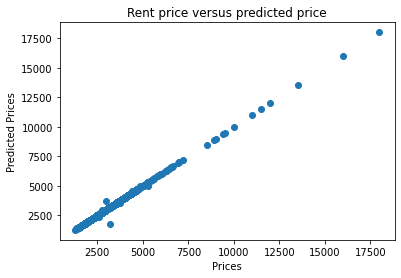

In [35]:
plt.scatter(y_train, y_pred_on_train)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Rent price versus predicted price Brooklyn')
plt.show()


In [41]:
#Now we will run our model on our queens dataset

from sklearn.neighbors import KNeighborsClassifier
X = queens[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = queens[['rent']]



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
parameters = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size': range(20, 40)}
knn_gs = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'neg_mean_squared_error', return_train_score = True)
knn_gs.fit(X_train, y_train)






GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': range(20, 40),
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [42]:
#Queens knn best estimator
knn_best = knn_gs.best_estimator_
print(knn_best)

KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [43]:
#Queens best score
knn_best_score = knn_gs.best_score_
print(knn_best_score)

-412886.801799687


In [44]:
#Queens predictions
knn_pred_on_train = knn_best.predict(X_train)
knn_pred_on_test = knn_best.predict(X_test)

In [48]:
#Queens mean absolute error
from sklearn.metrics import mean_absolute_error
y_true = y_train
y_pred_on_train = knn_pred_on_train
y_pred_on_test = knn_pred_on_test
knn_mae = mean_absolute_error(y_true, y_pred_on_train)
print('Mean Absolute Error Queens: ', + round(knn_mae, 3))




Mean Absolute Error Queens:  225.469


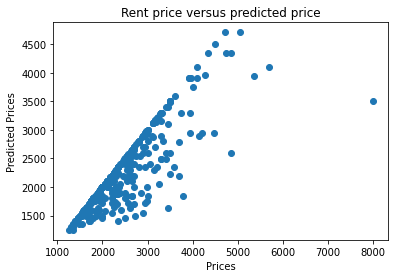

In [49]:
#Queens scatterplot of predicted price versus true price
plt.scatter(y_train, y_pred_on_train)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Rent price versus predicted price Queens')
plt.show()


In [50]:
#Now we will run our model on our manhattan dataset

from sklearn.neighbors import KNeighborsClassifier
X = manhattan[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = manhattan[['rent']]



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
parameters = {'n_neighbors': [1, 2, 3, 4, 5], 'weights': ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 'leaf_size': range(20, 40)}
knn_gs = GridSearchCV(estimator = knn, param_grid = parameters, scoring = 'neg_mean_squared_error', return_train_score = True)
knn_gs.fit(X_train, y_train)






GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': range(20, 40),
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [51]:
#Manhattan knn best estimator
knn_best = knn_gs.best_estimator_
print(knn_best)

KNeighborsClassifier(algorithm='brute', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [52]:
#Manhattan best score
knn_best_score = knn_gs.best_score_
print(knn_best_score)

-3299941.466481575


In [53]:
#Manhattan predictions
knn_pred_on_train = knn_best.predict(X_train)
knn_pred_on_test = knn_best.predict(X_test)

In [54]:
#Manhattan mean absolute error
from sklearn.metrics import mean_absolute_error
y_true = y_train
y_pred_on_train = knn_pred_on_train
y_pred_on_test = knn_pred_on_test
knn_mae = mean_absolute_error(y_true, y_pred_on_train)
print('Mean Absolute Error Manhattan: ', + round(knn_mae, 3))




Mean Absolute Error Manhattan:  568.575


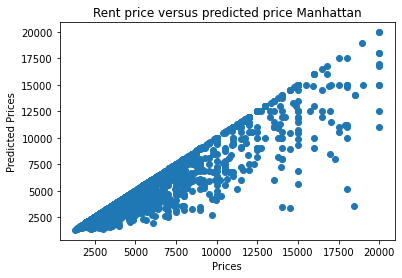

In [55]:
#Queens scatterplot of predicted price versus true price
plt.scatter(y_train, y_pred_on_train)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Rent price versus predicted price Manhattan')
plt.show()
